## Clean All Data here 

In [1]:
# Import the libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

**clean the Nigerian Tweets**

In [2]:
ng = pd.read_csv('data/NigeriaTweets.csv')
print(ng.shape)

(14068, 17)


In [3]:
ng.head(2)

,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2020-09-24 01:11:08+00:00,Thu Sep 24 01:11:08 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @lmun_ng: Delegate from Nigeria for Food an...,Delegate Nigeria Food Agriculture Organization,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,12,JurassicPlug,False,LMUN2020,lmun_ng,NaN,Between her legs
1,2020-09-24 01:41:48+00:00,Thu Sep 24 01:41:48 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @savndaniel: Young IDPs in Nigeria are sexu...,Young IDPs Nigeria sexually assaulted official...,"Sentiment(polarity=0.19999999999999998, subjec...",0.19999999999999998,0.41111111111111115,en,0,168,iam_xtova,NaN,NaN,savndaniel,NaN,"Jos, Abuja."


steps to cleaning:
1. Drop all rows where clean_text is NaN
2. Drop Duplicates rows
3. retain all rows where sentence is at least 3 words

In [31]:
def clean_tweets(df, csvfile):
    # drop na in clean tweets column
    df = df[df['clean_text'] != df['clean_text'].isna()]
    # dropduplicates and drop duplicates in clean tweets
    df = df.drop_duplicates().drop_duplicates(subset='clean_text')
    # convert int column appropriately
    df = df[df['polarity'] != 'polarity']
    # convert the created_at column to a datetime object
    df['created_at'] = pd.to_datetime(ng['created_at'], errors='coerce')
    df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d')
    # convert int column appropriately
    df['polarity'] = df['polarity'].astype('float16')
    df['subjectivity'] = df['subjectivity'].astype('float16')
    df['retweet_count'] = df['retweet_count'].astype('int8')
    df['favorite_count'] = df['favorite_count'].astype('int8')
    df.to_csv(csvfile, index=False)
    return df

ng = pd.read_csv('data/NigeriaTweets.csv')
ng = clean_tweets(ng, 'data/cleaned_ng_tweets.csv')
print(ng.shape)

(3539, 17)


In [32]:
ken = pd.read_csv('data/KenyaTweets.csv')
ken = clean_tweets(ken, 'data/cleaned_kenya_tweets.csv')
print(ken.shape)

(1065, 17)


In [33]:
sa = pd.read_csv('data/SouthAfricaTweets.csv')
sa = clean_tweets(sa, 'data/cleaned_sa_tweets.csv')
print(sa.shape)

(841, 17)


**Separate Tweets as lagos based tweets and others**

In [8]:
lagos_tweets = ng[ng['place_coord_boundaries'].str.contains('Lagos' or 'lagos')== True]
print(lagos_tweets.shape)

(790, 17)


In [9]:
lagos_tweets.head()

,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
2,2020-09-24 01:46:05+00:00,2020-09-24,"<a href=""http://twitter.com/download/android"" ...",With the current incident of Flood that occurr...,With current incident Flood occurred Kebbi sta...,"Sentiment(polarity=-0.04999999999999999, subje...",-0.049988,0.420898,en,6,3,CorpFarmersTV,False,FoodSystems,NaN,NaN,"Lagos, Nigeria Africa 🌍⏩🌏"
56,2020-09-24 05:40:46+00:00,2020-09-24,"<a href=""http://twitter.com/download/iphone"" r...",RT @samlogic_: What is quite unfortunate about...,What quite unfortunate Nigeria How low quality...,"Sentiment(polarity=-0.125, subjectivity=0.4250...",-0.125000,0.425049,en,0,37,ADE_RICH,NaN,NaN,samlogic_,NaN,"Lagos, Lagos Nigeria"
84,2020-09-24 06:57:17+00:00,2020-09-24,"<a href=""http://twitter.com/download/android"" ...",To all the class of Nigeria citizens who provi...,To theclass Nigeria citizens provide food raim...,"Sentiment(polarity=0.4, subjectivity=0.5625)",0.399902,0.562500,en,4,1,GbengaOmosebi_,NaN,NaN,NaN,"[[3.198942, 6.4826762], [3.43719, 6.4826762], ...","Lagos, Nigeria🇳🇬"
103,2020-09-24 07:38:13+00:00,2020-09-24,"<a href=""http://twitter.com/download/android"" ...",RT @akinsanyami: @aproko_doctor @adebayo_abdul...,Exactly doc represents Nigeria youths continue...,"Sentiment(polarity=-0.020833333333333343, subj...",-0.020828,0.395752,en,0,5,DahneeyDaniels,NaN,NaN,"akinsanyami, aproko_doctor, adebayo_abdul2",NaN,"Lagos, Nigeria"
104,2020-09-24 07:38:30+00:00,2020-09-24,"<a href=""http://twitter.com/download/android"" ...",RT @YusufMadu_: NIGERIA IS FACING A SERIOUS SE...,NIGERIA IS FACING A SERIOUS SECURITY CHALLENGE...,"Sentiment(polarity=-0.3333333333333333, subjec...",-0.333252,0.666504,en,0,-27,food_ikon,NaN,NaN,YusufMadu_,NaN,"Lagos, Nigeria"


In [10]:
other_tweets = ng[ng['place_coord_boundaries'].str.contains('Lagos' or 'lagos')== False]
print(other_tweets.shape)

(1995, 17)


Manually explore the data

In [11]:
for tweets in lagos_tweets['clean_text'].sample(10):
    print(tweets)

Nigeria never divided today give example things bad since .Tell rule law become joke govt chooses court order obey ignore.I n't even want talk insecurity hunger
COVID-19 Ecobank Nigeria Supports States With Food Items
Its actually ideal date youd get good food drinks two amount Lagos know right spot
Dem people wey dey charge food security Nigeria talk say COVID go affect food security Naija especially Lagos FCT two states
Happy Independence Day .What love Nigeria Im love varieties native food Amala favorite .What
U mean I insult dad gave free food free education free shelter basic amenities thrive life I n't need dad rich Dangote best Can I say Nigeria tho
I 'm food plug comes healthy meals give healthy meals tummy crave For Daily Lunch Packs Food trays soup amptews bowls cakes occasion location Lagos deliver anywhere lagos Dm please help RT
idiot His career ended shame Today ca n't count midst former players like Okocha Kanu
Fighting Hunger Extreme Poverty Written Paschal AgonsiHunger

In [12]:
for tweets in other_tweets['clean_text'].sample(10):
    print(tweets)

Goodmorning Nigeria We gearing launch Lagos Tommorow Wonderful times food del
I love fact Nigeria get police system2 I love say food dey scarce3 I love fact job youths4 I love say rich get richer whilst poor get poorer5 I love fact Sars harrasses youth however want without justice
Green amp White bottles celebration Nigeria 's independence Thursday Great ambiance great food groovy music
It well Same floods ravaging orthern nigeria local food supply chains God help recover loss keep us safe Amen
There even debates centered different contemporary topics including gender food sports Even Laycons discussions history always got hyped The problem Nigeria care little positive things dwell negative gives excuse
And damn food Some people even fly miles Nigeria going foreign rest
bribery n corruption get job Nigeria2- religion fighting other3-economy increase food 4-petroleum increase oil 5-nepa light tarrif high 6-poor health system7- security unstable8-voting system poor9-motivational speaker 

Randomly Selecting Tweets shows that people talk about food, Most times people complaain about **hunger** some things that could contribute to thses complains are:
1. COVID
2. Palliative Distributions
3. High Price of Food

Exploring a Tweet about advert shows that people dont pay too much attention to the advert 

In [12]:
lagos_tweets[lagos_tweets['clean_text'] == "Good morning Oshodi Oshogbo Nigeria Africa world order Guess y'all beautiful night I still sell nice palms sneakers sandals slides clothing accessories All affordable rate Kindly patronize please Do n't let hunger send back town"]

,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
10264,2020-09-29 05:42:30+00:00,Tue Sep 29 05:42:30 +0000 2020,"<a href=""http://twitter.com/download/android"" ...","Good morning Oshodi, Oshogbo, Nigeria, Africa ...",Good morning Oshodi Oshogbo Nigeria Africa wor...,"Sentiment(polarity=0.55, subjectivity=0.7)",0.55,0.7,en,6,7,GCFRinTheMaking,NaN,NaN,NaN,NaN,Lagos


In [13]:
lagos_tweets[lagos_tweets['clean_text'] == "Gov Sanwo-Olu CA-COVID Ceremonial Handover Food Palliatives State Government Lagos House Alausa Ikeja"]

,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
6497,2020-09-24 04:57:59+00:00,Thu Sep 24 04:57:59 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @followlasg: Gov. Sanwo-Olu at CA-COVID Cer...,Gov Sanwo-Olu CA-COVID Ceremonial Handover Foo...,"Sentiment(polarity=0.05, subjectivity=0.35)",0.05,0.35,en,0,17,Reginamundimush,NaN,NaN,followlasg,NaN,"Babaolosha-Mushin, Lagos, Nig."


The retweet count about the palliative is not so much

In [14]:
lagos_tweets[lagos_tweets['clean_text'] == "The COVID19 impact food production around world terrible one would think Nigeria alone facing"]

,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
2626,2020-09-27 09:37:34+00:00,Sun Sep 27 09:37:34 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @borie_nla: The COVID19 impact on food prod...,The COVID19 impact food production around worl...,"Sentiment(polarity=-1.0, subjectivity=1.0)",-1.0,1.0,en,0,3,ba55ey,NaN,NaN,borie_nla,NaN,"Lagos, Nigeria"


So instead of checking all the tweets one after another to see the retweets counts and likes why dont we evaluate thegeneral retweets counts let use the timeseries 

In [13]:
ng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 14054
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               3539 non-null   object 
 1   created_at              3539 non-null   object 
 2   source                  3539 non-null   object 
 3   original_text           3539 non-null   object 
 4   clean_text              3538 non-null   object 
 5   sentiment               3539 non-null   object 
 6   polarity                3539 non-null   float16
 7   subjectivity            3539 non-null   float16
 8   lang                    3539 non-null   object 
 9   favorite_count          3539 non-null   int8   
 10  retweet_count           3539 non-null   int8   
 11  original_author         3539 non-null   object 
 12  possibly_sensitive      1014 non-null   object 
 13  hashtags                761 non-null    object 
 14  user_mentions           2271 non-null  

In [21]:
def time_trend(df, city):
    ax = df.groupby('created_at')[['retweet_count', 'favorite_count']].sum().plot(figsize=(10,8))
    plt.title(f'Trend of likes and retweets for {city}', size=20)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


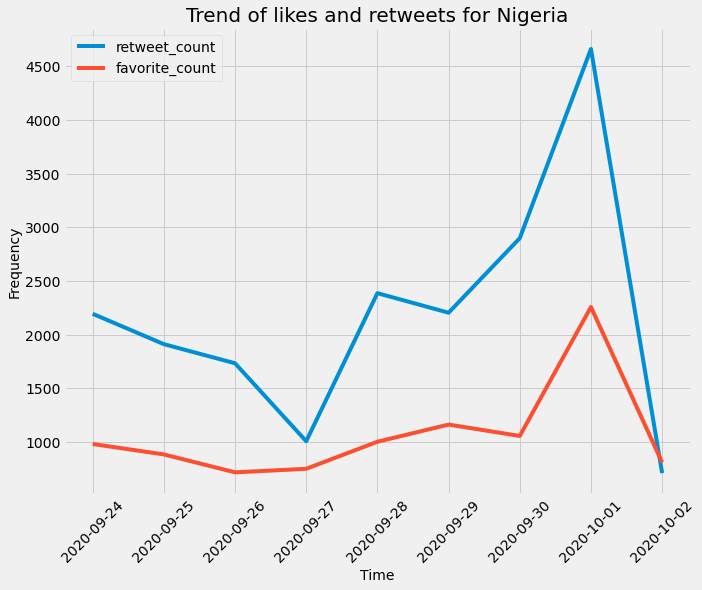

In [22]:
time_trend(ng, 'Nigeria')

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


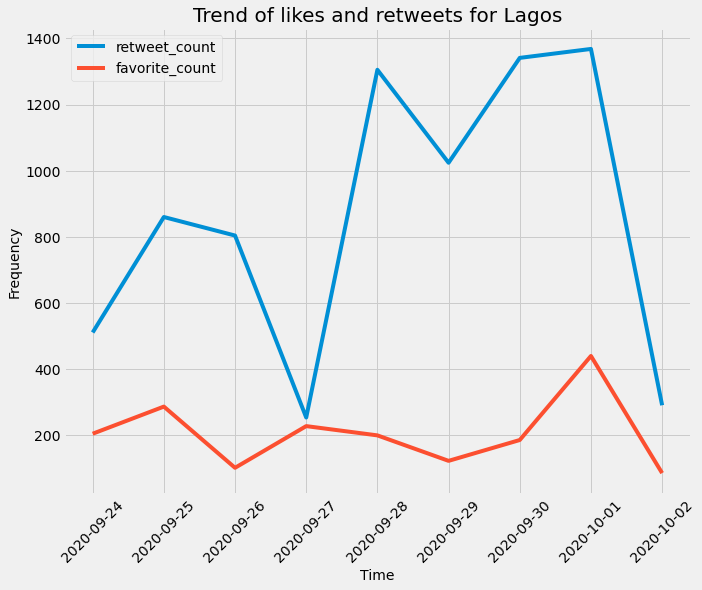

In [23]:
time_trend(lagos_tweets, 'Lagos')

c:\users\abuton\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


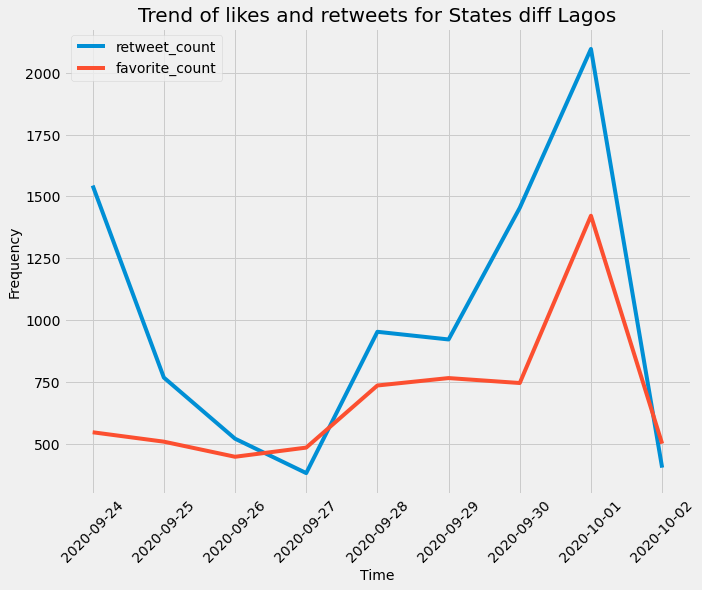

In [24]:
time_trend(other_tweets, 'States diff Lagos')

In [25]:
ng.to_csv('data/cleaned_ng_tweets.csv', index=False)

In [27]:
other_tweets[other_tweets['created_at'] == '2020-09-27']['clean_text'].values

array(['In Nigeria farming dangerous occupation merciless killings becoming prevalent',
       'Celebrating Nigeria NaijaFest Gage Park City Brampton We shared Nigerian food snacks Non-Nigerians taste naija',
       'Here youll work hard get basic things .. food clothing shelter Of course make easy get But easier acquire luxury youre talking better Nigeria Should even start taxes',
       'Big brother housemates packing food nylon get ready end today ..... This show rate hunger poverty Nigeria',
       'We faced serious problem food animal production Nigeria particularly poultry farmers Indiscriminate use antimicrobials n non-observance withdrawal periods sale consumption poultry poultry products disaster war AMR',
       "This opportunity Awudu 's Food Co. Abuja Nigeria",
       "This post Awudu 's Food Co. Abuja Nigeria",
       'little way I want help one million people start raising fish homes T',
       'Give leader Nigeria see mess would make It goes say',
       "I would voted '

### Now the Availability of Food

In [40]:
avail_ng = pd.read_csv('data/NigeriaTweetsAvailabilityofFood.csv')
print(avail_ng.shape)
avail_ng.head(3)

(10036, 17)


,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2020-09-24 01:11:08+00:00,Thu Sep 24 01:11:08 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @lmun_ng: Delegate from Nigeria for Food an...,Delegate Nigeria Food Agriculture Organization,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,12,JurassicPlug,False,LMUN2020,lmun_ng,NaN,Between her legs
1,2020-09-24 01:41:48+00:00,Thu Sep 24 01:41:48 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @savndaniel: Young IDPs in Nigeria are sexu...,Young IDPs Nigeria sexually assaulted official...,"Sentiment(polarity=0.19999999999999998, subjec...",0.19999999999999998,0.41111111111111115,en,0,168,iam_xtova,NaN,NaN,savndaniel,NaN,"Jos, Abuja."
2,2020-09-24 01:46:05+00:00,Thu Sep 24 01:46:05 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",With the current incident of Flood that occurr...,With current incident Flood occurred Kebbi sta...,"Sentiment(polarity=-0.04999999999999999, subje...",-0.04999999999999999,0.42083333333333334,en,6,3,CorpFarmersTV,False,FoodSystems,NaN,NaN,"Lagos, Nigeria Africa 🌍⏩🌏"


In [41]:
avail_ng = clean_tweets(avail_ng, csvfile='data/cleaned_avail_ng.csv')
print(avail_ng.shape)

(2809, 17)


In [42]:
avail_ken = pd.read_csv('data/KenyaTweetsAvailabilityofFood.csv')
print(avail_ken.shape)

avail_ken = clean_tweets(avail_ken, csvfile='data/cleaned_avail_ken.csv')
print(avail_ken.shape)

(3424, 17)
(865, 17)


In [43]:
avail_sa = pd.read_csv('data/SouthAfricaTweetsAvailabilityofFood.csv')
print(avail_sa.shape)

avail_sa = clean_tweets(avail_sa, csvfile='data/cleaned_avail_sa.csv')
print(avail_sa.shape)

(2527, 17)
(720, 17)


In [44]:
avail_ng['clean_text'].sample(10).values

array(['To achieve need global food system productive inclusive marginalized populations sus',
       'dre print N3000/5yards Available beautiful colours Location- Lagos Pick Alausa We deliver nat',
       'When food wrapped/served newspaper back Ghana Nigeria know food gon na slap',
       'E go reach one extent anybody wey support name Nigeria na beat e go receive Especially companies wey dey see free food dey pay tax How go tweet rubbish wey u dey country dey pay tax company Rubbish',
       'This development worrisome Considering initial submissions security threat influenced foreigners How reconcile latest invest Nigerians almost begging food Greater part Nigeria without rails What',
       'Our Heroes Farmers toil night day tilling land grow harvest process food keep us fed times colonisation Independence As celebrate Nigeria let us thank farmer today strive liberate us clutches hunger',
       "Tomorrow public holiday Nigeria Our food service business partners receiving payments

In [45]:
avail_ken['clean_text'].sample(10).values

array(['In arid lands northern traditional pastoralists almost entirely dependent livestock source food income milk But year swarms devastated grazing lands putting herders risk',
       'scientists conducted new highlighting impact pandemic two-thirds surveyed experienced economic hardship due pandemic',
       'As CCZ member Consumers International Summit fundamental global food availability We congratulate Helena CI Director General identified one champions',
       'We coordinated food worth Ksh.450 million received food donations worth another Ksh.430 million vulnerable households stated COVID-19 Emergency Response Fund Board Chairperson Jane Karuku',
       'Provide seed capital operationalize SME Partial Credit Guarantee SchemeBills payment holiday Kenya Power Limited Tax subsidy imported food',
       'One pathway food security initiative could critical element agribusiness development Kenya',
       'Well yall I got nominated Forbes Food Beverage section I months old',
       

In [46]:
avail_sa['clean_text'].sample(10).values

array(['Simba local chef I buy Cape Town makes amazing food Check A lot people town',
       "Hi I think wrong Fry 's 're vegan food company South Africa Mandy",
       'South Africa consist High rate unemployment When brag hungry At somepoint',
       "`` The Ubuntu Project initiative provided parcels organic vegetables hundreds vulnerable households townships since beginning lockdown well gardening starter kits seedlings grow vegetables ''",
       'German Embassy supporting food distribution project South',
       "Hundreds Zimbabweans arrested trying smuggle groceries back impoverished country South African border reopened first time six months `` There enough food hungry '' Memory Chauke tells",
       '`` Spain Argentina banned outdoor exercise entirely Israel limited walks within metres home.Chile',
       'Hi Indeed heritage remains Were celebrating South Africas fashionable flavourful lyrical linguistic Heritage Light-hearted chats offer break spark bit banter Come join us',
 

### Now Price of Food

In [47]:
ng_price = pd.read_csv('data/PriceofFoodNigeriaTweets.csv')
print(ng_price.shape)

(17133, 17)


In [48]:
ng_price.head(2)

,timestamp,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2020-09-24 01:11:08+00:00,Thu Sep 24 01:11:08 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @lmun_ng: Delegate from Nigeria for Food an...,Delegate Nigeria Food Agriculture Organization,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,12,JurassicPlug,False,LMUN2020,lmun_ng,NaN,Between her legs
1,2020-09-24 01:41:48+00:00,Thu Sep 24 01:41:48 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",RT @savndaniel: Young IDPs in Nigeria are sexu...,Young IDPs Nigeria sexually assaulted official...,"Sentiment(polarity=0.19999999999999998, subjec...",0.19999999999999998,0.41111111111111115,en,0,168,iam_xtova,NaN,NaN,savndaniel,NaN,"Jos, Abuja."


In [55]:
ng_price = clean_tweets(ng_price, csvfile='data/cleaned_price_ng.csv')
print(ng_price.shape)

(3964, 17)


In [56]:
ken_price = pd.read_csv('data/PriceofFoodKenyaTweets.csv')
print(ken_price.shape)

ken_price = clean_tweets(ken_price, csvfile='data/cleaned_price_ken.csv')
print(ken_price.shape)

(6033, 17)
(1159, 17)


In [57]:
sa_price = pd.read_csv('data/PriceofFoodSouthAfricaTweets.csv')
print(sa_price.shape)

sa_price = clean_tweets(sa_price, csvfile='data/cleaned_price_sa.csv')
print(sa_price.shape)

(3977, 17)
(901, 17)


In [54]:
sub3 = pd.read_csv('shola.csv')
sub2 = pd.read_csv('CATBOOST_KFOLD_2.csv')

pred = sub3['default_status'] * 0.6 + sub1['default_status']*0.4

sub3['default_status'] = pred
sub3.to_csv('stacker1.csv', index=False)